# Task 2

To solve this problem, you need to classify images and split pictures of cats and dogs using a soft margin classifier and the parameter C. The input data is the dataset Dogs vs. Cats

In [1]:
#defining function to obtain histogram of intensity
import cv2
def extract_hist(img, bins=(8, 8, 8)):
    hist = cv2.calcHist([img], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [2]:
#google disk mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#we have prepared data for training and testing, let's read it
from imutils import paths
img_train_path = sorted(list(paths.list_images('/content/drive/My Drive/Digital culture/Semester2/cats_dogs/train/')))

In [4]:
#obtaining labels and histograms for each image
import os
def get_labels_and_hists(paths, data, labels):
  for (i, path) in enumerate(paths):
    image = cv2.imread(path, 1)
    label = path.split(os.path.sep)[-1].split(".")[0]
    hist = extract_hist(image)
    data.append(hist)
    labels.append(label)

In [5]:
#preparation of testing and training data
train_data = []
train_labels = []
get_labels_and_hists(img_train_path, train_data, train_labels)

In [6]:
#create binary labels for classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_labels_le = le.fit_transform(train_labels)

0 cat


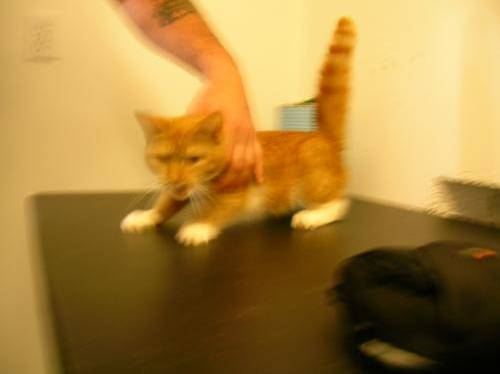

In [9]:
#let's check the label of the first image
from IPython.display import Image
print(train_labels_le[0], train_labels[0])
Image(filename = img_train_path[0])

Train the classifier on the provided sample given that C = 0.51 and random_state = 9. Use the parameter random_state = 9 to split the data into training and test sets in a ratio of 75 to 25.

In [10]:
#splitting data and test sets
from sklearn.model_selection import train_test_split
import numpy as np
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(train_data), train_labels_le, test_size = 0.25, random_state = 9)

In [11]:
#training the model of the almost separating hyperplane
from sklearn.svm import LinearSVC
model = LinearSVC(C = 0.51, random_state = 9)
model.fit(trainData, trainLabels)

LinearSVC(C=0.51, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=9, tol=0.0001,
          verbose=0)

Enter the value of coefficient θ256, θ124, θ370 of the constructed hyperplane.

In [12]:
print(model.coef_[0][256], model.coef_[0][124], model.coef_[0][370])

0.00889301941028135 6.81787740480213e-05 -0.04373256504566072


Make a confusion matrix for each class and find precision and recall. Then, calculate the value of the metric  for each class:

In [13]:
#let's see the prediction results
from sklearn.metrics import classification_report
predictions = model.predict(testData)
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.57      0.77      0.66       119
         dog       0.70      0.47      0.56       131

    accuracy                           0.62       250
   macro avg       0.63      0.62      0.61       250
weighted avg       0.64      0.62      0.61       250



In [14]:
from sklearn.metrics import f1_score
f1_score(testLabels, predictions, average='macro')

0.6103896103896105

Obtain predictions for the images below. Enter the assigned class: either 0 or 1.

File names: cat.1046.jpg, dog.1025.jpg, cat.1042.jpg cat.1003.jpg

In [15]:
def test_image(path):
  singleImage = cv2.imread(path)
  histt = extract_hist(singleImage)
  histt2 = histt.reshape(1, -1)
  prediction = model.predict(histt2)
  print('class = ', prediction)

In [16]:
prefix = '/content/drive/My Drive/Digital culture/Semester2/cats_dogs/test/'
test_pics = ['cat.1046.jpg', 'dog.1025.jpg', 'cat.1042.jpg', 'cat.1003.jpg']
for pic in test_pics:
  test_image(prefix + pic)

class =  [1]
class =  [0]
class =  [1]
class =  [0]


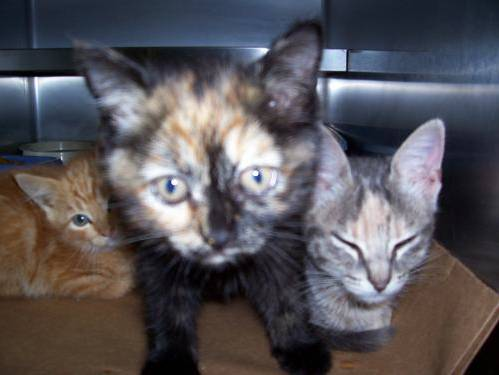

In [17]:
Image(filename = prefix + test_pics[0])

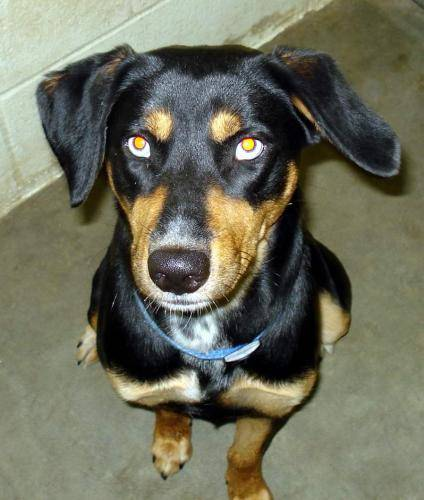

In [18]:
Image(filename = prefix + test_pics[1])

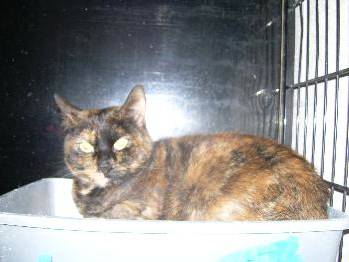

In [19]:
Image(filename = prefix + test_pics[2])

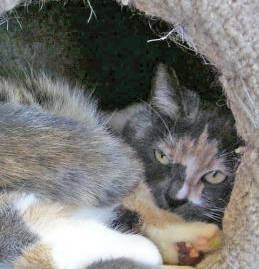

In [20]:
Image(filename = prefix + test_pics[3])